here I will test the backtest work or not

In [1]:
import sys
import os
root_dir = os.getcwd().replace('/notebooks','')
sys.path.insert(1, root_dir)
import pandas as pd
import ast
import numpy as np
from datetime import datetime as dt
import glob
from zipline.utils.run_algo import load_extensions
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendar_utils import get_calendar
import os
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)
from zipline.data.bundles import register, unregister, ingest
from zipline.data.bundles.csvdir import csvdir_equities
from zipline.utils.calendar_utils import register_calendar, get_calendar

from zipline.api import (order, 
                         record, 
                         symbol,
                         get_datetime,
                         order_target_percent,
                         order_target_value,
                         set_benchmark,
                         get_open_orders)
from zipline import run_algorithm
from zipline.utils.calendar_utils import get_calendar
from zipline.api import order_target, record, date_rules, time_rules, symbol
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
import matplotlib.pyplot as plt

import quantstats as qs
import pyfolio as pf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bundle = 'snp500'
calendar_name = 'NYSE'
calendar = get_calendar(calendar_name)
bundle_data = bundles.load(bundle)
sids = bundle_data.asset_finder.sids
assets = bundle_data.asset_finder.retrieve_all(sids)
tickers = [coin.symbol for coin in assets]

In [3]:
len(tickers)

501

simple buy and hold strategy for Apple

In [8]:


def initialize(context):
    context.has_ordered = False
    context.asset = symbol('AAPL')
    #context.set_commission(commission.PerShare(cost=0.0075, min_trade_cost=1.0))
    

    


def handle_data(context, data):
    prices = data.current(context.asset, 'price')
    if not context.has_ordered:
        order(context.asset, 100)
        context.has_ordered = True
    
    record(BTC=data.current(context.asset, 'price'))


              

    

start = '2018-01-20'
end = '2023-03-27'
capital_base = 100000

results = run_algorithm(
    start=pd.Timestamp(start, tz='utc'),
    end=pd.Timestamp(end, tz='utc'),
    initialize=initialize,
    handle_data=handle_data,
    capital_base=capital_base,
    trading_calendar=calendar,
    bundle=bundle,
    data_frequency='daily'
)


In [9]:
results

,period_open,period_close,portfolio_value,longs_count,shorts_count,long_value,short_value,long_exposure,pnl,capital_used,...,alpha,beta,sharpe,sortino,max_drawdown,max_leverage,excess_return,treasury_period_return,trading_days,period_label
2018-01-22 21:00:00+00:00,2018-01-22 14:31:00+00:00,2018-01-22 21:00:00+00:00,100000.000,0,0,0.0,0.0,0.0,0.000,0.000,...,None,None,NaN,NaN,0.000000,0.000000,0.0,0.0,1,2018-01
2018-01-23 21:00:00+00:00,2018-01-23 14:31:00+00:00,2018-01-23 21:00:00+00:00,99997.687,1,0,4426.0,0.0,4426.0,-2.313,-4428.313,...,None,None,-11.224972,-11.224972,-0.000023,0.044261,0.0,0.0,2,2018-01
2018-01-24 21:00:00+00:00,2018-01-24 14:31:00+00:00,2018-01-24 21:00:00+00:00,99927.187,1,0,4355.5,0.0,4355.5,-70.500,0.000,...,None,None,-9.619693,-9.460749,-0.000728,0.044261,0.0,0.0,3,2018-01
2018-01-25 21:00:00+00:00,2018-01-25 14:31:00+00:00,2018-01-25 21:00:00+00:00,99849.487,1,0,4277.8,0.0,4277.8,-77.700,0.000,...,None,None,-14.145032,-11.383706,-0.001505,0.044261,0.0,0.0,4,2018-01
2018-01-26 21:00:00+00:00,2018-01-26 14:31:00+00:00,2018-01-26 21:00:00+00:00,99859.387,1,0,4287.7,0.0,4287.7,9.900,0.000,...,None,None,-10.552621,-9.511431,-0.001505,0.044261,0.0,0.0,5,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-21 20:00:00+00:00,2023-03-21 13:31:00+00:00,2023-03-21 20:00:00+00:00,111499.687,1,0,15928.0,0.0,15928.0,188.000,0.000,...,None,None,0.660253,0.951426,-0.050091,0.159977,0.0,0.0,1301,2023-03
2023-03-22 20:00:00+00:00,2023-03-22 13:31:00+00:00,2023-03-22 20:00:00+00:00,111354.687,1,0,15783.0,0.0,15783.0,-145.000,0.000,...,None,None,0.652197,0.939682,-0.050091,0.159977,0.0,0.0,1302,2023-03
2023-03-23 20:00:00+00:00,2023-03-23 13:31:00+00:00,2023-03-23 20:00:00+00:00,111464.687,1,0,15893.0,0.0,15893.0,110.000,0.000,...,None,None,0.657736,0.947732,-0.050091,0.159977,0.0,0.0,1303,2023-03
2023-03-24 20:00:00+00:00,2023-03-24 13:31:00+00:00,2023-03-24 20:00:00+00:00,111596.687,1,0,16025.0,0.0,16025.0,132.000,0.000,...,None,None,0.664407,0.957448,-0.050091,0.159977,0.0,0.0,1304,2023-03


<AxesSubplot:>

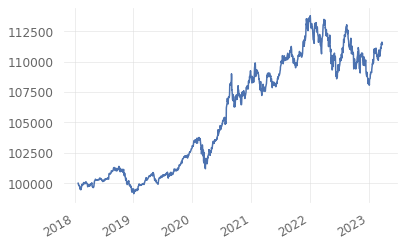

In [10]:
results.portfolio_value.plot()